### Packages

In [ ]:
%reset -f

In [7]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re
from PIL import Image


## Spatial frequency

In [ ]:
# ~~~~~~~~~~~~~ Importing data from param.json
cwd = os.getcwd() # get current working directory
parent_dir = os.path.dirname(os.path.dirname(cwd)) # Get the parent directory
param_path = os.path.join(parent_dir, 'experiment', 'stimuli', 'visual', 'param.json') # specify the paramter's path
with open(param_path) as f: # open json file
    param = json.load(f)
globals().update(param) # create the param for variables
# ~~~~~~~~~~~~~ Importing data from param.json ~~~~~~~~~~~~~



# ~~~~~~~~~~~~~ Functions
def extract_number(image_name): # to extract the numeric part from the image name
    # Use a regular expression to extract digits from the string
    match = re.search(r'\d+', image_name)
    return int(match.group()) if match else 0
# ~~~~~~~~~~~~~ Functions ~~~~~~~~~~~~~



# ~~~~~~~~~~~~~ 2D fourier transform
stimuli_parent_folder = os.path.join(parent_dir, 'experiment', 'stimuli', 'visual')
folder_names = ['singledotsize_cont', 'totaldotsize_cont', 'circumference_cont']

images = {}
# condition loop
for folder_name in folder_names:
    target_folder = os.path.join(stimuli_parent_folder, folder_name) # e.g, visual/singledotsize_cont
    num_folder_names = [f for f in os.listdir(target_folder) if os.path.isdir(os.path.join(target_folder, f))]
    num_folder_names = sorted(num_folder_names, key=extract_number)

    # numerosity loop
    for num_folder_name in num_folder_names:
        target_num_folder = os.path.join(target_folder, num_folder_name)
        image_names = [f for f in os.listdir(target_num_folder) if os.path.isfile(os.path.join(target_num_folder, f))]
        image_names = sorted(image_names, key=extract_number)

        # image loop
        for i, image_name in enumerate(image_names):
            image_path = os.path.join(target_num_folder, image_name)
            img = Image.open(image_path).convert('L')
            image_array = np.array(img)  # Open the image 
            fft_image = np.fft.fft2(image_array) # Compute the 2D Fourier Transform
            fft_image_shifted = np.fft.fftshift(fft_image) # Shift the zero-frequency component to the center

            images[f'{folder_name}_{num_folder_name}_{i+1}'] = fft_image_shifted
            print(f'{folder_name}_{num_folder_name}_image_{i+1} is done')
            
# ~~~~~~~~~~~~~ 2D fourier transform ~~~~~~~~~~~~~

In [29]:
# Custom sort function based on 'numerosity'
def sort_by_numerosity(key):
    # Split the key and find the 'numerosity' part
    parts = key.split('_')
    for i, part in enumerate(parts):
        if part == 'numerosity':
            return int(parts[i + 1])  # Extract the number after 'numerosity'
    return 0

sorted_images = dict(sorted(images.items(), key=lambda item: sort_by_numerosity(item[0])))
# Convert dictionary keys to a list
keys_list = list(sorted_images.keys())
keys_list[1]
for i in range(5):
    print(i)

0
1
2
3
4


In [ ]:
# Custom sort function based on 'numerosity'
def sort_by_numerosity(key):
    # Split the key and find the 'numerosity' part
    parts = key.split('_')
    for i, part in enumerate(parts):
        if part == 'numerosity':
            return int(parts[i + 1])  # Extract the number after 'numerosity'
    return 0

sorted_images = dict(sorted(images.items(), key=lambda item: sort_by_numerosity(item[0])))
n = len(sorted_images) # 1260
RDM = np.zeros((n, n))

# Convert dictionary keys to a list
keys_list = list(sorted_images.keys())
for i in range(n): # Compute the Euclidean distance between each pair of numerosities
    for j in range(n):
        matrix_x1 = sorted_images[f'{keys_list[i]}'].flatten()
        matrix_x2 = sorted_images[f'{keys_list[j]}'].flatten()
        correlation_matrix = np.corrcoef(matrix_x1, matrix_x2)
        RDM[i, j] = np.abs(correlation_matrix[0, 1])

    print(f'{keys_list[i]} is done')


RDM = RDM / np.max(RDM) # Normalize the RDM
np.fill_diagonal(RDM, np.nan)  # Remove diagonal elements
upper_tri_mask = np.triu(np.ones(RDM.shape), k=0).astype(bool) # Create an upper triangular mask (including the diagonal)
RDM[upper_tri_mask] = np.nan   # Apply the mask and set the upper triangle to NaN



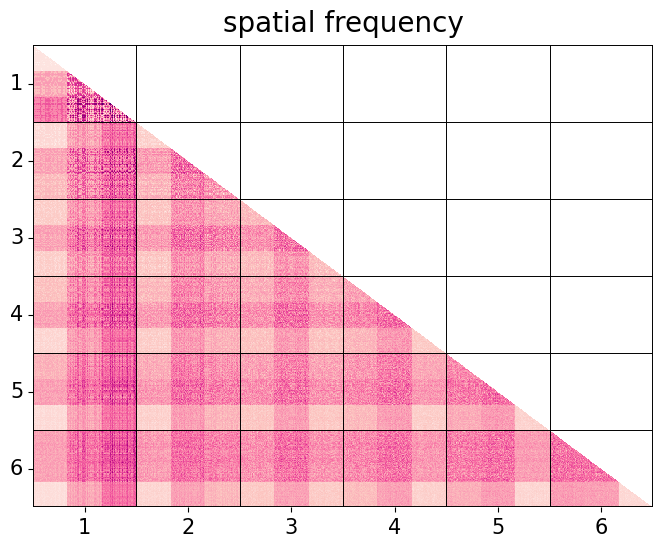

In [35]:
RDM_spatialF = 1 - RDM

# ~~~~~~~~~~~~~~~~ Save RDM as a NumPy binary file (.npy)
rsa_image_dict = os.path.join(cwd, 'RDM')
rdm_path = os.path.join(rsa_image_dict, 'rdm_spatial_frequency.npy')
np.save(rdm_path, RDM_spatialF)  # Save as .npy


# ~~~~~~~~~~~~~~~~ RDM visualization
# paramters
mask = np.triu(np.ones_like(RDM, dtype=bool), k=1)  # Create a mask to show only the lower triangle (or upper triangle if desired), # k=1 means keep the lower triangle, excluding the diagonal
ticks_positions = np.arange((n/6) /2, n, 210).tolist() # Positions in the heatmap corresponding from 1 to 6
ticks_labels = list(range(1,7)) # Labels for the ranges
blackline_positions = np.arange(0, n, 210).tolist()


image_name = f'rdm_spatial_frequency.png'
image_path = os.path.join(rsa_image_dict, image_name)

# plot and save the figure
plt.figure(figsize=(8, 6))
sns.heatmap(RDM_spatialF, annot=False, cmap="RdPu", cbar=False, mask=mask)
plt.xticks(ticks=ticks_positions, labels=ticks_labels, rotation=0, fontsize=15)
plt.yticks(ticks=ticks_positions, labels=ticks_labels, fontsize=15)
# Draw horizontal black lines
for _ in blackline_positions:
    plt.axhline(_, color='black', linewidth=0.7)  
    plt.axvline(_, color='black', linewidth=0.7)  
plt.axhline(y=1257, color='black', linewidth=0.7)  
plt.axvline(x=1259, color='black', linewidth=0.7) 

plt.title('spatial frequency', fontsize=20, pad=10)
plt.savefig(image_path, format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()
# ~~~~~~~~~~~~~~~~ RDM visualization ~~~~~~~~~~~~~~~~

# numerosity, area of single dot, area of total dots, circumference of total dots

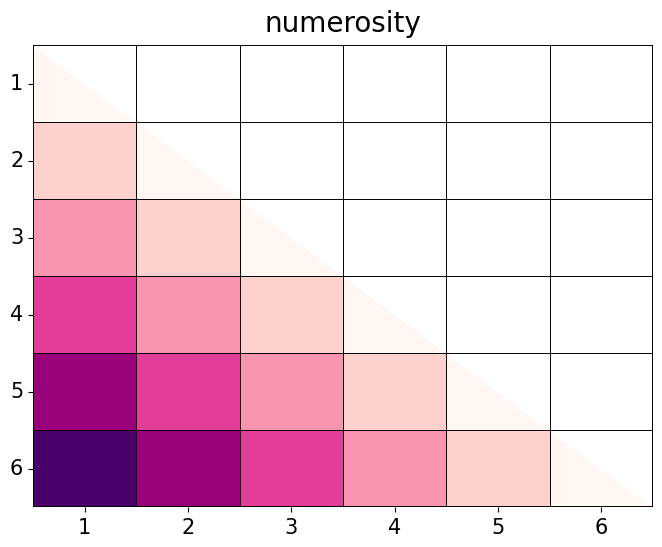

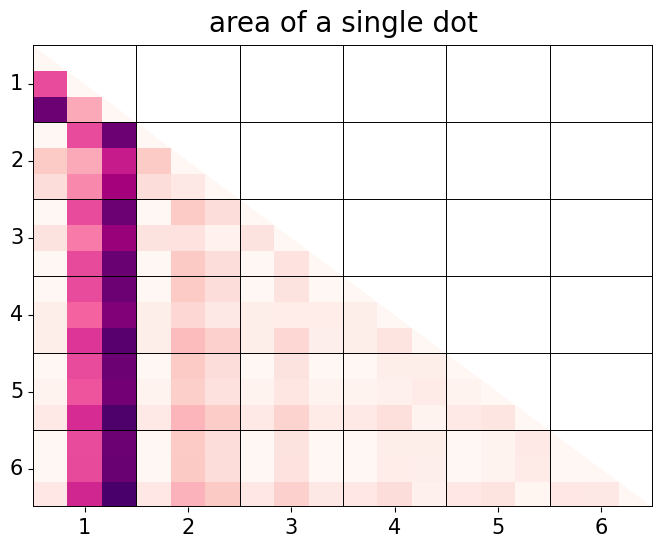

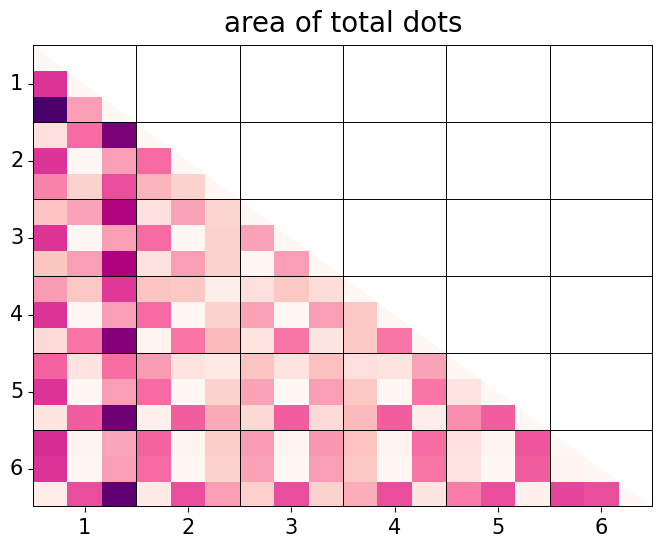

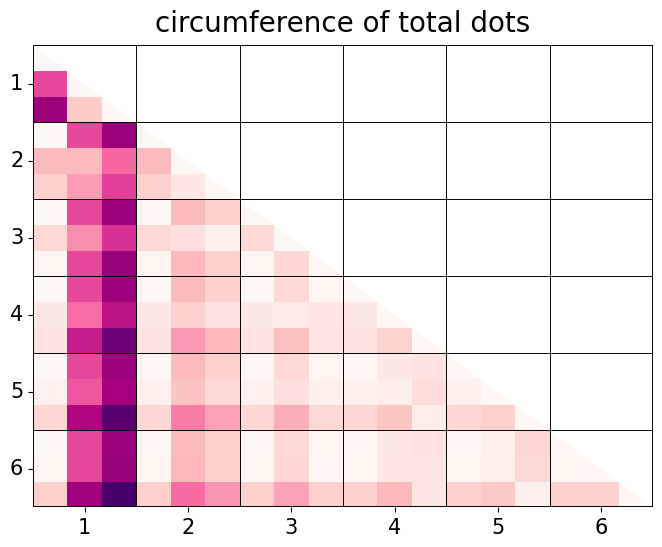

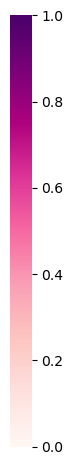

In [5]:
# ~~~~~~~~~~~~~ Importing data from param.json
cwd = os.getcwd() # get current working directory
parent_dir = os.path.dirname(os.path.dirname(cwd)) # Get the parent directory
param_path = os.path.join(parent_dir, 'experiment', 'stimuli', 'visual', 'param.json') # specify the paramter's path
with open(param_path) as f: # open json file
    param = json.load(f)
globals().update(param) # create the param for variables
# ~~~~~~~~~~~~~ Importing data from param.json ~~~~~~~~~~~~~



# ~~~~~~~~~~~~~ Vector creation
# Numeoristy vector 1260 * 1
num_vector = [i for i in numerosity for _ in range(total_n_trials)] 

# radius vector for each numerosity (70 trials * 3 condition = 210 * 1)
radius_vector = []
for i in numerosity: # Loop over the keys '1' to '6' 
    num_key = str(i)  # Convert loop index to string to match your dictionary keys
    x = np.concatenate((     # Concatenate the lists for the current key
        [singledotsize_cont_radius_px[num_key] for _ in range(n_trials)], # singledot controlled 
        [totaldotsize_cont_radius_px[num_key] for _ in range(n_trials)], # totaldot controlled 
        [circumference_cont_radius_px[num_key] for _ in range(n_trials)] # circumference controlled 
    ), axis=0)
    radius_vector.append(x)
radius_vector = np.concatenate(radius_vector, axis=0)

# generate 3 vectors using radius info (1. signle dot area, 2. total dot area, 3. total circumference)
vectors = {
    'numerosity': num_vector,
    'area of a single dot': np.pi * np.square(radius_vector), # Compute the area for each radius
    'area of total dots' : (np.pi * np.square(radius_vector)) * num_vector,  # Compute the totaldot area for each radius
    'circumference of total dots' : 2 * np.pi * radius_vector  # Compute the totaldot area for each radius
    }
# ~~~~~~~~~~~~~ Vector creation ~~~~~~~~~~~~~



# ~~~~~~~~~~~~~~~~ RDM computation
# directory for saving RDM
rsa_image_dict = os.path.join(cwd, 'RDM') # specify the directory for stroing images
os.makedirs(rsa_image_dict, exist_ok=True)

for vector_name, current_vector in vectors.items(): 
    n = len(num_vector)
    RDM = np.zeros((n, n))

    for i in range(n): # Compute the Euclidean distance between each pair of numerosities
        for j in range(n):
            RDM[i, j] = np.abs(current_vector[i] - current_vector[j])
    RDM = RDM / np.max(RDM) # Normalize the RDM
    np.fill_diagonal(RDM, np.nan)  # Remove diagonal elements
    upper_tri_mask = np.triu(np.ones(RDM.shape), k=0).astype(bool) # Create an upper triangular mask (including the diagonal)
    RDM[upper_tri_mask] = np.nan   # Apply the mask and set the upper triangle to NaN
    # ~~~~~~~~~~~~~~~~ RDM computation ~~~~~~~~~~~~~~~~



    # ~~~~~~~~~~~~~~~~ Save RDM as a NumPy binary file (.npy)
    rdm_path = os.path.join(rsa_image_dict, f'rdm_{vector_name.replace(" ", "_")}.npy')
    np.save(rdm_path, RDM)  # Save as .npy
    # ~~~~~~~~~~~~~~~~ Save RDM as a NumPy binary file (.npy) ~~~~~~~~~~~~~~~~



    # ~~~~~~~~~~~~~~~~ RDM visualization
    # paramters
    mask = np.triu(np.ones_like(RDM, dtype=bool), k=1)  # Create a mask to show only the lower triangle (or upper triangle if desired), # k=1 means keep the lower triangle, excluding the diagonal
    ticks_positions = np.arange((n/6) /2, n, 210).tolist() # Positions in the heatmap corresponding from 1 to 6
    ticks_labels = list(range(1,7)) # Labels for the ranges
    blackline_positions = np.arange(0, n, 210).tolist()



    image_name = f'rdm_{vector_name.replace(" ", "_")}.png'
    image_path = os.path.join(rsa_image_dict, image_name)

    # plot and save the figure
    plt.figure(figsize=(8, 6))
    sns.heatmap(RDM, annot=False, cmap="RdPu", cbar=False, mask=mask)
    plt.xticks(ticks=ticks_positions, labels=ticks_labels, rotation=0, fontsize=15)
    plt.yticks(ticks=ticks_positions, labels=ticks_labels, fontsize=15)
    # Draw horizontal black lines
    for _ in blackline_positions:
        plt.axhline(_, color='black', linewidth=0.7)  
        plt.axvline(_, color='black', linewidth=0.7)  
    plt.axhline(y=1257, color='black', linewidth=0.7)  
    plt.axvline(x=1259, color='black', linewidth=0.7) 

    plt.title(vector_name, fontsize=20, pad=10)
    plt.savefig(image_path, format='png', bbox_inches='tight', pad_inches=0.2)
    plt.show()
    # ~~~~~~~~~~~~~~~~ RDM visualization ~~~~~~~~~~~~~~~~


# ~~~~~~~~~~~~~~~~ supplement download only color bar
dummy_data = np.array([[0, 1]])  # Dummy data for cbar
cbar_image_path = os.path.join(rsa_image_dict, 'colorbar_only.png') # Path to save the color bar
plt.figure(figsize=(3, 7))  # Create a figure for the color bar
sns.heatmap(dummy_data, cmap="RdPu", cbar=True, cbar_kws={"shrink": 0.8}, annot=False)
plt.gca().set_visible(False)  # Hide the axes
# Save the color bar only
plt.savefig(cbar_image_path, format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()
